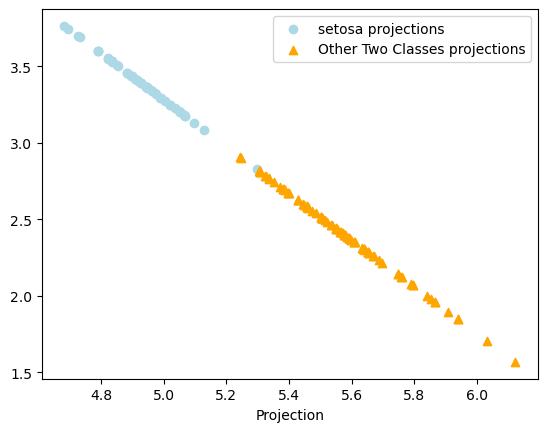

Projected Mean of setosa (c1): -0.12192442828309763
Projected Mean of versicolor/virginica (c2): 1.0317203184939974
W:  [ 0.5483082  -0.83627634]


In [1]:
#best W projections
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
sepal_length = iris.data[:, 0]  # Sepal length values
sepal_width = iris.data[:, 1]   # Sepal width values
class_labels = iris.target       # Class labels (0: setosa, 1: versicolor, 2: virginica)

# Separate the data into two classes
c1_data = np.array([[sl, sw] for sl, sw, cls in zip(sepal_length, sepal_width, class_labels) if cls == 0])
c2_data = np.array([[sl, sw] for sl, sw, cls in zip(sepal_length, sepal_width, class_labels) if cls != 0])

# Calculate the means of each class
mean_c1 = np.mean(c1_data, axis=0)
mean_c2 = np.mean(c2_data, axis=0)

# Calculate the between-class scatter matrix
sb = np.outer(mean_c1 - mean_c2, mean_c1 - mean_c2)

# Calculate the within-class scatter matrix
sw = ((c1_data-mean_c1).T)@(c1_data-mean_c1) + ((c2_data-mean_c2).T)@(c2_data-mean_c2)

# Calculate the eigenvectors and eigenvalues of the generalized eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(sw) @ sb)

# Sort the eigenvectors based on the eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the best eigenvector as the projection vector
w = eigenvectors[:, 0]

# Project all the points onto the projection vector
c1_projections = c1_data @ w
c2_projections = c2_data @ w

c1_distances = np.abs(c1_data @ w - mean_c1 @ w)
c2_distances = np.abs(c2_data @ w - mean_c2 @ w)

c1projectionXaxis = c1_projections * w[0] + 5
c1projectionYaxis = c1_projections * w[1] + 3.28
c2projectionXaxis = c2_projections * w[0] + 5
c2projectionYaxis = c2_projections * w[1] + 3.28


# Plot the projections
plt.scatter(c1projectionXaxis, c1projectionYaxis, marker='o', color='lightblue', label='setosa projections')
plt.scatter(c2projectionXaxis, c2projectionYaxis, marker='^', color='orange', label='Other Two Classes projections')

plt.xlabel('Projection')
plt.legend()
plt.show()

# Print the projected means
mean_c1_projection = np.mean(c1_projections)
mean_c2_projection = np.mean(c2_projections)
print("Projected Mean of setosa (c1):", mean_c1_projection)
print("Projected Mean of versicolor/virginica (c2):", mean_c2_projection)
print("W: ", w)

# print("\n a_i class 1:", c1_distances)
# print("\n\n a_i class 1:", c2_distances)


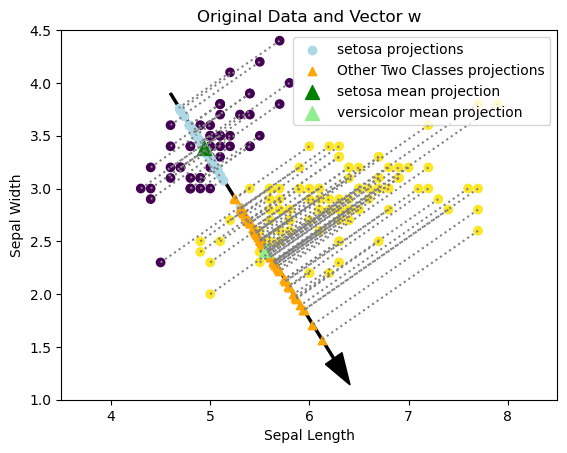

In [2]:
#projections on the best W
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
sepal_length = iris.data[:, 0]  # Sepal length values
sepal_width = iris.data[:, 1]   # Sepal width values
class_labels = iris.target       # Class labels (0: setosa, 1: versicolor, 2: virginica)

# Separate the data into two classes
c1_data = np.array([[sl, sw] for sl, sw, cls in zip(sepal_length, sepal_width, class_labels) if cls == 0])
c2_data = np.array([[sl, sw] for sl, sw, cls in zip(sepal_length, sepal_width, class_labels) if cls != 0])

# Calculate the means of each class
mean_c1 = np.mean(c1_data, axis=0)
mean_c2 = np.mean(c2_data, axis=0)

# Calculate the between-class scatter matrix
sb = np.outer(mean_c1 - mean_c2, mean_c1 - mean_c2)

# Calculate the within-class scatter matrix
sw = ((c1_data-mean_c1).T)@(c1_data-mean_c1) + ((c2_data-mean_c2).T)@(c2_data-mean_c2)

# Calculate the eigenvectors and eigenvalues of the generalized eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(sw) @ sb)

# Sort the eigenvectors based on the eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the best eigenvector as the projection vector
w = eigenvectors[:, 0]


# Project all the points onto the projection vector
c1_projections = c1_data @ w
c2_projections = c2_data @ w

# make other two classes than Setosa as one single class
class_labels[class_labels == 2] = 1


# Scale the vector w
scaling_factor = 3.0  # Adjust the scaling factor as desired
scaled_w = w * scaling_factor


# Plot the original data points and the vector w
plt.scatter(sepal_length, sepal_width, c=class_labels, cmap='viridis')
plt.arrow(4.6, 3.9, scaled_w[0], scaled_w[1], color='black', width=0.02, head_width=0.2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Original Data and Vector w')

c1projectionXaxis = c1_projections * w[0] + 5
c1projectionYaxis = c1_projections * w[1] + 3.28
c2projectionXaxis = c2_projections * w[0] + 5
c2projectionYaxis = c2_projections * w[1] + 3.28

# Plot the projections of the points on vector w

plt.scatter(c1projectionXaxis , c1projectionYaxis, marker='o', color='lightblue', label='setosa projections')
plt.scatter(c2projectionXaxis,c2projectionYaxis , marker='^', color='orange', label='Other Two Classes projections')

# Plot the means of the projections
plt.scatter(np.mean(c1projectionXaxis), np.mean(c1projectionYaxis), marker='^', color='green', label='setosa mean projection', s=100)
plt.scatter(np.mean(c2projectionXaxis), np.mean(c2projectionYaxis), marker='^', color='lightgreen', label='versicolor mean projection', s=100)
        
# Plot the distances as dotted lines
for i in range(len(c1_data)):
    plt.plot([c1_data[i, 0], c1projectionXaxis[i]], [c1_data[i, 1], c1projectionYaxis[i]], color='grey', linestyle='dotted')
for i in range(len(c2_data)):
    plt.plot([c2_data[i, 0], c2projectionXaxis[i]], [c2_data[i, 1], c2projectionYaxis[i]], color='grey', linestyle='dotted')
    
plt.xlim(3.5,8.5)
plt.ylim(1,4.5)    
    
plt.legend()
plt.show()

